## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

earlystop10 = EarlyStopping(monitor="val_accuracy",
                            patience=10,
                            verbose=1
                           )
earlystop25 = EarlyStopping(monitor="val_accuracy",
                            patience=25,
                            verbose=1
                           )
EARLYSTOPS = [earlystop10, earlystop25]

results = {}
i = 0
for earlystop in EARLYSTOPS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Numbers of exp: %i" % (i))

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}
    i+=1

Numbers of exp: 0
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128) 

Epoch 46/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.5776 - accuracy: 0.8285 - val_loss: 1.6220 - val_accuracy: 0.4912
Epoch 47/50
50000/50000 [==============================] - 12s 250us/step - loss: 0.5588 - accuracy: 0.8364 - val_loss: 1.6061 - val_accuracy: 0.4981
Epoch 48/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.5429 - accuracy: 0.8433 - val_loss: 1.6409 - val_accuracy: 0.4916
Epoch 00048: early stopping
Numbers of exp: 1
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________

50000/50000 [==============================] - 12s 249us/step - loss: 0.6274 - accuracy: 0.8086 - val_loss: 1.5908 - val_accuracy: 0.4916
Epoch 43/50
50000/50000 [==============================] - 12s 247us/step - loss: 0.6098 - accuracy: 0.8153 - val_loss: 1.6079 - val_accuracy: 0.4896
Epoch 44/50
50000/50000 [==============================] - 12s 247us/step - loss: 0.5901 - accuracy: 0.8232 - val_loss: 1.6220 - val_accuracy: 0.4888
Epoch 45/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.5731 - accuracy: 0.8302 - val_loss: 1.6304 - val_accuracy: 0.4867
Epoch 46/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.5579 - accuracy: 0.8362 - val_loss: 1.6377 - val_accuracy: 0.4896
Epoch 47/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.5383 - accuracy: 0.8450 - val_loss: 1.6424 - val_accuracy: 0.4843
Epoch 48/50
50000/50000 [==============================] - 12s 249us/step - loss: 0.5239 - accuracy: 0.8493 - va

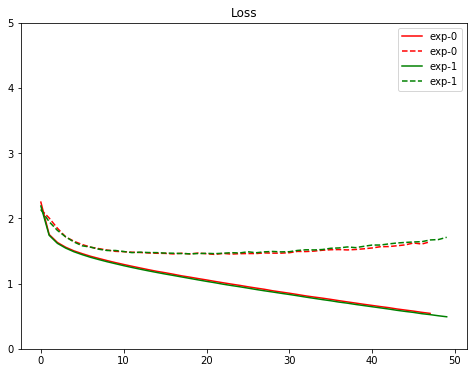

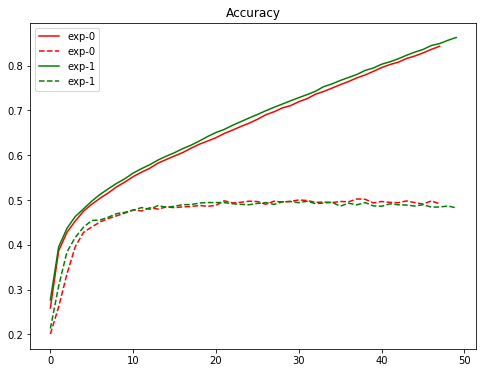

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()